In [1]:
get_ipython().run_line_magic('matplotlib', 'inline')
# Importing standard Qiskit libraries and configuring account
from qiskit import *
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import numpy as np

In [2]:
from qiskit.providers.aer import noise, QasmSimulator, StatevectorSimulator, UnitarySimulator
from qiskit.providers.aer.noise import NoiseModel


# Loading your IBM Q account(s)
TOKEN ='32df0ea3fc138c8c6122a5e8def5d1a77b954f7d8d463265a1c788100803c5be93d42bfca4b7ce270497c7df1b6004e46493e16e0cf916563f72d06671cc837b'
IBMQ.save_account(TOKEN)
IBMQ.load_account() # Load account from disk
providers = IBMQ.providers()
provider = IBMQ.get_provider(hub ='ibm-q')
print(provider)
print(provider.backends())
backend = provider.get_backend('ibmq_london')



Credentials already present. Set overwrite=True to overwrite.


AuthenticationLicenseError: 'License required. You need to accept the License.'

In [3]:
def state_creation_circuit(index,qubits):
    if index == 1:
        state_create=QuantumCircuit(qubits,qubits)
    elif index ==2:
        state_create=QuantumCircuit(qubits,qubits)
        state_create.x(0)
    elif index == 3:
        state_create=QuantumCircuit(qubits,qubits)
        state_create.x(qubits-1)
        state_create.x(0)
    elif index == 4:
        state_create=QuantumCircuit(qubits,qubits)
        for i in range(qubits):
            state_create.x(i)
    return state_create

countdown={}
noisycounts={}

In [14]:
#w3 circuit (1 of 4)
w3=state_creation_circuit(1,3)
w3.ry(-1.23096,0)
w3.x(1)
w3.x(2)
w3.cx(0,1)
w3.ry(np.pi/4,0)
w3.cx(1,0)
w3.ry(-1*np.pi/4,0)
w3.x(0)
w3.x(1)
w3.cx(0,2)
w3.cx(1,2)
w3.measure(0,0)
w3.measure(1,1)
w3.measure(2,2)
w3.draw()

┌────────────┐     ┌──────────┐┌───┐┌───────────┐┌───┐          ┌─┐   »
q_0: |0>┤ Ry(-1.231) ├──■──┤ Ry(pi/4) ├┤ X ├┤ Ry(-pi/4) ├┤ X ├──■───────┤M├───»
        └───┬───┬────┘┌─┴─┐└──────────┘└─┬─┘└───┬───┬───┘└───┘  │       └╥┘┌─┐»
q_1: |0>────┤ X ├─────┤ X ├──────────────■──────┤ X ├───────────┼────■───╫─┤M├»
            ├───┤     └───┘                     └───┘         ┌─┴─┐┌─┴─┐ ║ └╥┘»
q_2: |0>────┤ X ├─────────────────────────────────────────────┤ X ├┤ X ├─╫──╫─»
            └───┘                                             └───┘└───┘ ║  ║ »
 c_0: 0 ═════════════════════════════════════════════════════════════════╩══╬═»
                                                                            ║ »
 c_1: 0 ════════════════════════════════════════════════════════════════════╩═»
                                                                              »
 c_2: 0 ══════════════════════════════════════════════════════════════════════»
                                                                              »
«        
«q_0: ───
«        
«q_1: ───
«     ┌─┐
«q_2: ┤M├
«     └╥┘
«c_0: ═╬═
«      ║ 
«c_1: ═╬═
«      ║ 
«c_2: ═╩═
«

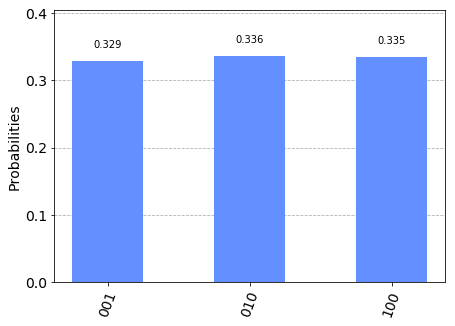

In [6]:
backend = Aer.get_backend('qasm_simulator')
result = execute(w3,backend,shots=10000).result()
counts = result.get_counts()
countdown["V1"]=counts
plot_histogram(counts)
#returns natively 001, 100, and 010 at about 33% each

In [8]:
#w circuit (2 of 4)
w32=state_creation_circuit(2,3)
w32.ry(-1.23096,0)
w32.x(1)
w32.x(2)
w32.cx(0,1)
w32.ry(np.pi/4,0)
w32.cx(1,0)
w32.ry(-1*np.pi/4,0)
w32.x(0)
w32.x(1)
w32.cx(0,2)
w32.cx(1,2)
w32.measure(0,0)
w32.measure(1,1)
w32.measure(2,2)
w32.draw()

┌───┐┌────────────┐     ┌──────────┐┌───┐┌───────────┐┌───┐          »
q_0: |0>┤ X ├┤ Ry(-1.231) ├──■──┤ Ry(pi/4) ├┤ X ├┤ Ry(-pi/4) ├┤ X ├──■───────»
        ├───┤└────────────┘┌─┴─┐└──────────┘└─┬─┘└───┬───┬───┘└───┘  │       »
q_1: |0>┤ X ├──────────────┤ X ├──────────────■──────┤ X ├───────────┼────■──»
        ├───┤              └───┘                     └───┘         ┌─┴─┐┌─┴─┐»
q_2: |0>┤ X ├──────────────────────────────────────────────────────┤ X ├┤ X ├»
        └───┘                                                      └───┘└───┘»
 c_0: 0 ═════════════════════════════════════════════════════════════════════»
                                                                             »
 c_1: 0 ═════════════════════════════════════════════════════════════════════»
                                                                             »
 c_2: 0 ═════════════════════════════════════════════════════════════════════»
                                                                             »
«     ┌─┐      
«q_0: ┤M├──────
«     └╥┘┌─┐   
«q_1: ─╫─┤M├───
«      ║ └╥┘┌─┐
«q_2: ─╫──╫─┤M├
«      ║  ║ └╥┘
«c_0: ═╩══╬══╬═
«         ║  ║ 
«c_1: ════╩══╬═
«            ║ 
«c_2: ═══════╩═
«

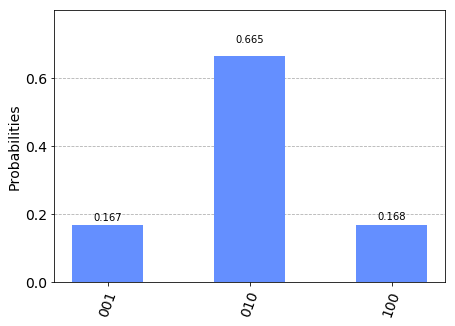

In [11]:
backend = Aer.get_backend('qasm_simulator')
result = execute(w32,backend,shots=10000).result()
counts = result.get_counts()
countdown["V2"]=counts
plot_histogram(counts)
#natively returns 001 and 100 at about 16% (about 1/6th each) and 010 at 66%

In [15]:
#w circuit (3 of 4)
w33=state_creation_circuit(3,3)
w33.ry(-1.23096,0)
w33.x(1)
w33.x(2)
w33.cx(0,1)
w33.ry(np.pi/4,0)
w33.cx(1,0)
w33.ry(-1*np.pi/4,0)
w33.x(0)
w33.x(1)
w33.cx(0,2)
w33.cx(1,2)
w33.measure(0,0)
w33.measure(1,1)
w33.measure(2,2)
w33.draw()

┌───┐┌────────────┐     ┌──────────┐┌───┐┌───────────┐┌───┐          »
q_0: |0>┤ X ├┤ Ry(-1.231) ├──■──┤ Ry(pi/4) ├┤ X ├┤ Ry(-pi/4) ├┤ X ├──■───────»
        ├───┤└────────────┘┌─┴─┐└──────────┘└─┬─┘└───┬───┬───┘└───┘  │       »
q_1: |0>┤ X ├──────────────┤ X ├──────────────■──────┤ X ├───────────┼────■──»
        ├───┤    ┌───┐     └───┘                     └───┘         ┌─┴─┐┌─┴─┐»
q_2: |0>┤ X ├────┤ X ├─────────────────────────────────────────────┤ X ├┤ X ├»
        └───┘    └───┘                                             └───┘└───┘»
 c_0: 0 ═════════════════════════════════════════════════════════════════════»
                                                                             »
 c_1: 0 ═════════════════════════════════════════════════════════════════════»
                                                                             »
 c_2: 0 ═════════════════════════════════════════════════════════════════════»
                                                                             »
«     ┌─┐      
«q_0: ┤M├──────
«     └╥┘┌─┐   
«q_1: ─╫─┤M├───
«      ║ └╥┘┌─┐
«q_2: ─╫──╫─┤M├
«      ║  ║ └╥┘
«c_0: ═╩══╬══╬═
«         ║  ║ 
«c_1: ════╩══╬═
«            ║ 
«c_2: ═══════╩═
«

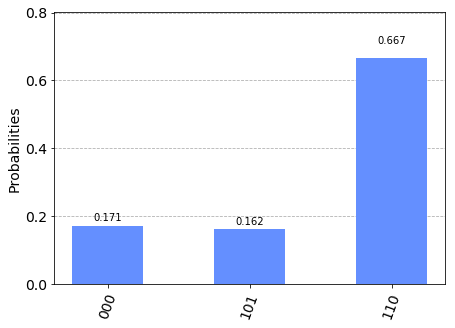

In [34]:
backend = Aer.get_backend('qasm_simulator')
result = execute(w33,backend,shots=10000).result()
counts = result.get_counts()
countdown["V3"]=counts
plot_histogram(counts)
#returns natively 000, 101 at about 16% each and 110 at 66%

In [17]:
#w34 circuit (4 of 4)
w34=state_creation_circuit(4,3)
w34.ry(-1.23096,0)
w34.x(1)
w34.x(2)
w34.cx(0,1)
w34.ry(np.pi/4,0)
w34.cx(1,0)
w34.ry(-1*np.pi/4,0)
w34.x(0)
w34.x(1)
w34.cx(0,2)
w34.cx(1,2)
w34.measure(0,0)
w34.measure(1,1)
w34.measure(2,2)
w34.draw()

┌───┐┌────────────┐     ┌──────────┐┌───┐┌───────────┐┌───┐          »
q_0: |0>┤ X ├┤ Ry(-1.231) ├──■──┤ Ry(pi/4) ├┤ X ├┤ Ry(-pi/4) ├┤ X ├──■───────»
        ├───┤└───┬───┬────┘┌─┴─┐└──────────┘└─┬─┘└───┬───┬───┘└───┘  │       »
q_1: |0>┤ X ├────┤ X ├─────┤ X ├──────────────■──────┤ X ├───────────┼────■──»
        ├───┤    ├───┤     └───┘                     └───┘         ┌─┴─┐┌─┴─┐»
q_2: |0>┤ X ├────┤ X ├─────────────────────────────────────────────┤ X ├┤ X ├»
        └───┘    └───┘                                             └───┘└───┘»
 c_0: 0 ═════════════════════════════════════════════════════════════════════»
                                                                             »
 c_1: 0 ═════════════════════════════════════════════════════════════════════»
                                                                             »
 c_2: 0 ═════════════════════════════════════════════════════════════════════»
                                                                             »
«     ┌─┐      
«q_0: ┤M├──────
«     └╥┘┌─┐   
«q_1: ─╫─┤M├───
«      ║ └╥┘┌─┐
«q_2: ─╫──╫─┤M├
«      ║  ║ └╥┘
«c_0: ═╩══╬══╬═
«         ║  ║ 
«c_1: ════╩══╬═
«            ║ 
«c_2: ═══════╩═
«

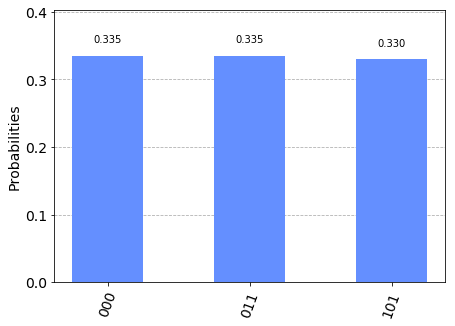

In [18]:
backend = Aer.get_backend('qasm_simulator')
result = execute(w34,backend,shots=10000).result()
counts = result.get_counts()
countdown["V4"]=counts
plot_histogram(counts)
#print(counts["0000"])
#produces states 000, 011, 101 all at 33%

In [19]:
#This function creates a noise model to apply to a circuit 
# Returns- the amount of counts for each state with noise ML: How does this work??? 
def applyNoise(qc):
    gate_lengths = [
    ('u1', None, 0), ('u2', None, 100), ('u3', None, 200),
    ('cx', [1, 0], 678), ('cx', [1, 2], 547), ('cx', [2, 3], 721),
    ('cx', [4, 3], 733), ('cx', [4, 10], 721), ('cx', [5, 4], 800),
    ('cx', [5, 6], 800), ('cx', [5, 9], 895), ('cx', [6, 8], 895),
    ('cx', [7, 8], 640), ('cx', [9, 8], 895), ('cx', [9, 10], 800),
    ('cx', [11, 10], 721), ('cx', [11, 3], 634), ('cx', [12, 2], 773),
    ('cx', [13, 1], 2286), ('cx', [13, 12], 1504), ('cx', [], 800)
   ]#what are the gate lengths needed for? In units of ns
    noise_model = NoiseModel.from_backend(properties, gate_lengths=gate_lengths)
    #noise_model = noise.device.basic_device_noise_model(properties, gate_lengths=gate_lengths)
    #print(noise_model)
    basis_gates = noise_model.basis_gates
    #simulator = Aer.get_backend('qasm_simulator')
    result_noise = execute(qc, backend_sim, shots = 10000,
                          noise_model = noise_model,
                          coupling_map = coupling_map,
                          basis_gates = basis_gates).result()
    counts_noise = result_noise.get_counts(qc)
    return counts_noise

In [42]:
#left off here need to change next
def fidelity(total):
    temp=countdown["V1"]
    value1=(np.absolute(temp["001"]-(1/3)*total)+np.absolute(temp["100"]-(1/3)*total)+np.absolute(temp["010"]-(1/3)*total))/total
    value1=1-value1
    temp=countdown["V2"]
    value2=(np.absolute(temp["001"]-(1/6)*total)+np.absolute(temp["100"]-(1/6)*total)+np.absolute(temp["010"]-(2/3)*total))/total
    value2=1-value2
    temp=countdown["V3"]
    value3=(np.absolute(temp["000"]-(1/6)*total)+np.absolute(temp["110"]-(2/3)*total)+np.absolute(temp["101"]-(1/6)*total))/total
    value3=1-value3
    temp=countdown["V4"]
    value4=(np.absolute(temp["000"]-(1/3)*total)+np.absolute(temp["011"]-(1/3)*total)+np.absolute(temp["101"]-(1/3)*total))/total
    value4=1-value4
    avg=(value1+value2+value3+value4)/4
    print(avg)

In [41]:
temp2 = countdown["V3"]
for i in temp2:
    print(i)

0010
0001
0100


In [38]:
fidelity(10000)

0.9921333333333333


In [39]:
##Backends options

#takes as argument a circuit, a choice of backend (numbered), and a device name (str)
#if choice ==1, device name is irrelevant
def backend_choice(qc,choice,device_name):
    if choice == 1:
        ##simulator
        backend = Aer.get_backend('qasm_simulator')
        result = execute(qc,backend,shots=10000).result()
        counts = result.get_counts()
        noise = 0
    if choice == 2:
        ##Using real machine as a backend
        provider = IBMQ.get_provider(hub='ibm-q')
        backend_sim = provider.get_backend(device_name)
        properties = device.properties() #will be used to help generate a noise model to run on the simulator
        coupling_map = device.configuration().coupling_map
        result = execute(qc,backend,shots=10000).result()
        counts = result.get_counts()
        noise=applyNoise(qc)#returns noisy state counts data
    if choice == 3:
        ##Using real machines as noise model
        provider = IBMQ.get_provider(hub = 'ibm-q') 
        device = provider.get_backend(device_name) 
        result = execute(qc, backend).result()
        counts=result.get_counts()
        noise=0
    return counts,noise
 


In [43]:
##Get w3 circuit noise and fidelity

for i in range(1,5):
    text="V"+str(i)
    w3=0
    w3=state_creation_circuit(i,3)
    w3.ry(-1.23096,0)
    w3.x(1)
    w3.x(2)
    w3.cx(0,1)
    w3.ry(np.pi/4,0)
    w3.cx(1,0)
    w3.ry(-1*np.pi/4,0)
    w3.x(0)
    w3.x(1)
    w3.cx(0,2)
    w3.cx(1,2)
    w3.measure(0,0)
    w3.measure(1,1)
    w3.measure(2,2)
    (counts,noise)=backend_choice(w3,1,'ibmq_london')
    #result = execute(repeater,backend,shots=10000).result()
    #counts = result.get_counts()
    countdown[text]=counts
    noisycounts[text]=noise

print("fidelity:")
fidelity(10000)

fidelity:
0.9823999999999999
